## Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
np.random.seed(42)  # For reproducibility

## A - Discriminant Function

For the two classes $ C_1 $ and $ C_2 $, we have:
- $ p(x|C_1) = N(\mu_1, \sigma_1) = \frac{1}{\sqrt{2\pi\sigma_1^2}} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} $,
- $ p(x|C_2) = N(\mu_2, \sigma_2) = \frac{1}{\sqrt{2\pi\sigma_2^2}} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}} $.

We know that in a Bayesian classification problem, the discriminant function for a class $ C_k $ is defined as:

$$ g_k(x) = \ln \big( P(C_k) \big) + \ln \big( p(x|C_k) \big) $$
where:
- $ P(C_k) $ is the prior probability of class $ C_k $,
- $ p(x|C_k) $ is the class-conditional probability density function (PDF) for $ x $.

So, we have:

* Discriminant function for $ C_1 $:

$$ 
g_1(x) = \ln(\pi_1) + \ln \left( \frac{1}{\sqrt{2\pi\sigma_1^2}} e^{-\frac{(x - \mu_1)^2}{2\sigma_1^2}} \right)
$$

$$
g_1(x) = \ln(\pi_1) - \frac{1}{2} \ln(2\pi\sigma_1^2) - \frac{(x - \mu_1)^2}{2\sigma_1^2} 
$$

* Discriminant function for $ C_2 $:
$$ 
g_2(x) = \ln(\pi_2) + \ln \left( \frac{1}{\sqrt{2\pi\sigma_2^2}} e^{-\frac{(x - \mu_2)^2}{2\sigma_2^2}} \right)
$$

$$
g_2(x) = \ln(\pi_2) - \frac{1}{2} \ln(2\pi\sigma_2^2) - \frac{(x - \mu_2)^2}{2\sigma_2^2} 
$$

The general discriminant function is:

$$
g(x) = g_1(x) - g_2(x) 
$$

$$
g(x) = \left[ \ln(\pi_1) - \frac{1}{2} \ln(2\pi\sigma_1^2) - \frac{(x - \mu_1)^2}{2\sigma_1^2} \right] - \left[ \ln(\pi_2) - \frac{1}{2} \ln(2\pi\sigma_2^2) - \frac{(x - \mu_2)^2}{2\sigma_2^2} \right]
$$

$$
g(x) = \ln(\pi_1) - \ln(\pi_2) - \frac{1}{2} \ln(2\pi\sigma_1^2) + \frac{1}{2} \ln(2\pi\sigma_2^2) - \frac{(x - \mu_1)^2}{2\sigma_1^2} + \frac{(x - \mu_2)^2}{2\sigma_2^2}
$$

$$
g(x) = \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) + \frac{(x - \mu_2)^2}{2\sigma_2^2} - \frac{(x - \mu_1)^2}{2\sigma_1^2}
$$

This function $ g(x) $ determines the decision boundary:
- If $ g(x) > 0 $, classify $ x $ as belonging to $ C_1 $,
- If $ g(x) < 0 $, classify $ x $ as belonging to $ C_2 $.

In [1]:
def class_discriminant_func(x, mu, sigma, pi):
    return np.log(pi) - 0.5 * np.log(2 * np.pi * (sigma**2)) - (x - mu)**2 / 2 * (sigma**2) 

In [3]:
def problem_discriminant_func(x, mu1, sigma1, pi1, mu2, sigma2, pi2):
    return class_discriminant_func(x, mu1, sigma1, pi1) - class_discriminant_func(x, mu2, sigma2, pi2)

## B - Decision Boundry

Decision boundary is the points where the probabilities of assigning $ x $ to either class $ C_1 $ or $ C_2 $ are equal. To find it for the **minimum error** classification using the general discriminant function $ g(x) $, we solve for $ x $ such that:

$$
g(x) = 0
$$

$$
\ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) + \frac{(x - \mu_2)^2}{2\sigma_2^2} - \frac{(x - \mu_1)^2}{2\sigma_1^2} = 0
$$

$$
\ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) = \frac{(x - \mu_1)^2}{2\sigma_1^2} - \frac{(x - \mu_2)^2}{2\sigma_2^2}
$$

$$
2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right] = \frac{(x - \mu_1)^2}{\sigma_1^2} - \frac{(x - \mu_2)^2}{\sigma_2^2}
$$

$$
\frac{(x - \mu_1)^2}{\sigma_1^2} - \frac{(x - \mu_2)^2}{\sigma_2^2} = 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right]
$$

$$
\frac{x^2 - 2x\mu_1 + \mu_1^2}{\sigma_1^2} - \frac{x^2 - 2x\mu_2 + \mu_2^2}{\sigma_2^2} = 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right]
$$

$$
\frac{x^2}{\sigma_1^2} - \frac{2x\mu_1}{\sigma_1^2} + \frac{\mu_1^2}{\sigma_1^2} - \frac{x^2}{\sigma_2^2} + \frac{2x\mu_2}{\sigma_2^2} - \frac{\mu_2^2}{\sigma_2^2} = 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right]
$$

$$
\left(\frac{1}{\sigma_1^2} - \frac{1}{\sigma_2^2}\right) x^2 + \left(-\frac{2\mu_1}{\sigma_1^2} + \frac{2\mu_2}{\sigma_2^2}\right) x + \left(\frac{\mu_1^2}{\sigma_1^2} - \frac{\mu_2^2}{\sigma_2^2}\right) = 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right]
$$

$$
\left(\frac{1}{\sigma_1^2} - \frac{1}{\sigma_2^2}\right) x^2 + \left(-\frac{2\mu_1}{\sigma_1^2} + \frac{2\mu_2}{\sigma_2^2}\right) x + \left(\frac{\mu_1^2}{\sigma_1^2} - \frac{\mu_2^2}{\sigma_2^2}\right) - 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right] = 0
$$

Now, we have a quadratic equation. Let:
$$
A = \frac{1}{\sigma_1^2} - \frac{1}{\sigma_2^2}, 
\quad B = -\frac{2\mu_1}{\sigma_1^2} + \frac{2\mu_2}{\sigma_2^2}, 
\quad C = \frac{\mu_1^2}{\sigma_1^2} - \frac{\mu_2^2}{\sigma_2^2} - 2 \left[ \ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) \right]
$$

To solve this quadratic equation we can use the quadratic formula:
$$
x = \frac{-B \pm \sqrt{B^2 - 4AC}}{2A}
$$


In [87]:
def disicion_boundary(x , g_x):
    return x[np.argmin(np.abs(g_x))]

## C - Effect of Increasing $\pi_1$ on Decision Boundry

The decision boundary is the point $ x $ where:
$$
g(x) = 0,
$$

$$
\ln\left(\frac{\pi_1}{\pi_2}\right) - \frac{1}{2} \ln\left(\frac{\sigma_1^2}{\sigma_2^2}\right) + \frac{(x - \mu_2)^2}{2\sigma_2^2} - \frac{(x - \mu_1)^2}{2\sigma_1^2} = 0
$$

$$
\ln(\pi_1) - \ln(\pi_2) = \frac{(x - \mu_2)^2}{2\sigma_2^2} - \frac{(x - \mu_1)^2}{2\sigma_1^2}.
$$

When $ \pi_1 $ increases, $ \ln(\pi_1) $ grows larger while $ \ln(\pi_2) = \ln(1 - \pi_1) $ decreases. This causes the left-hand side of the equation to increase. To maintain the balance, the right-hand side compensates by shifting the decision boundary $ x $ in favor of Class 1, meaning that a larger portion of the feature space will now be classified as belonging to Class 1.

In other words, as $ \pi_1 $ increases, the classifier demands stronger evidence (a larger $ x $) to classify a sample as belonging to Class 2. This results in the boundary moving closer to Class 2.

This outcome is consistent with the principles of Bayesian decision-making, where prior probabilities influence classification. A higher prior for one class increases its importance, making the classifier more likely to assign samples to that class.

## Utils

In [80]:
def plot_scatter(samples1, samples2, decision_boundary):
    plt.figure(figsize=(10, 6))

    plt.title("Scatter Plot of Samples + Decision Boundary", fontsize=14)
    plt.xlabel("x", fontsize=12)
    plt.ylabel("Density", fontsize=12)

    plt.scatter(samples1, np.zeros_like(samples1), label="Class 1 Samples", alpha=0.6)
    plt.scatter(samples2, np.zeros_like(samples2), label="Class 2 Samples", alpha=0.6)

    plt.axvline(decision_boundary, color="black", label="Decision Boundary")

    plt.legend(fontsize=10)
    plt.grid()
    plt.show()

In [82]:
class Classifier:
    def __init__(self, data, true_labels):
        self.data = data
        self.true_labels = true_labels

    def predict(self, threshold):
        return [1 if x < threshold else 2 for x in self.data]

In [83]:
class EvaluationMetrics:
    def __init__(self, data, true_labels, decision_boundary):
        self.data = data
        self.true_labels = true_labels

        self.predict(decision_boundary)

    def predict(self, threshold=None):
        classifier = Classifier(self.data, self.true_labels)
        self.predictions = classifier.predict(threshold)

        self.tp = sum([1 for i in range(200) if self.true_labels[i] == 1 and self.predictions[i] == 1])
        self.tn = sum([1 for i in range(200) if self.true_labels[i] == 2 and self.predictions[i] == 2])
        self.fp = sum([1 for i in range(200) if self.true_labels[i] == 2 and self.predictions[i] == 1])
        self.fn = sum([1 for i in range(200) if self.true_labels[i] == 1 and self.predictions[i] == 2])

    def accuracy(self):
        return (self.tp + self.tn) / (self.tp + self.tn + self.fp + self.fn)

    def precision(self):
        return self.tp / (self.tp + self.fp)

    def recall(self):
        return self.tp / (self.tp + self.fn)

    def f1_score(self):
        precision = self.precision()
        recall = self.recall()

        return 2 * precision * recall / (precision + recall)
    
    def plot_confusion_matrix(self):
        matrix = np.array([[self.tp, self.fp], [self.fn, self.tn]])
        
        plt.figure(figsize=(8, 6))
        plt.imshow(matrix, interpolation="nearest", cmap=plt.cm.Blues)
        plt.title("Confusion Matrix", fontsize=14)
        plt.colorbar()
        
        classes = ["1", "2"]
        plt.xticks([0, 1], classes)
        plt.yticks([0, 1], classes)
        
        plt.ylabel("True Label", fontsize=12)
        plt.xlabel("Predicted Label", fontsize=12)
        
        for i in range(2):
            for j in range(2):
                plt.text(j, i, str(matrix[i, j]), horizontalalignment="center", color="black")
        
        plt.show()
    
    def calculate_tpr_fpr(self, g_x):
        thresholds = np.sort(g_x)
        thresholds = np.concatenate(([-np.inf], thresholds, [np.inf]))

        tpr_values = []
        fpr_values = []

        for threshold in thresholds:
            self.predict(threshold)

            tpr_values.append(self.tp / (self.tp + self.fn))
            fpr_values.append(self.fp / (self.fp + self.tn))

        return tpr_values, fpr_values
    
    def plot_roc_curve(self, g_x):
        tpr_values, fpr_values = self.calculate_tpr_fpr(g_x)
        auc = np.trapz(tpr_values, fpr_values)

        plt.figure(figsize=(8, 6))

        plt.plot(fpr_values, tpr_values, color="blue", lw=2, label="ROC Curve")
        plt.plot([0, 1], [0, 1], color="red", linestyle="--", label="Random Guessing")

        plt.title(f"ROC Curve (AUC: {auc})", fontsize=14)

        plt.xlabel("False Positive Rate", fontsize=12)
        plt.ylabel("True Positive Rate", fontsize=12)

        plt.legend(fontsize=10)
        plt.grid()
        plt.show()
    
    def print_metrics(self):
        print(f"Accuracy: {self.accuracy()}")
        print(f"Precision: {self.precision()}")
        print(f"Recall: {self.recall()}")
        print(f"F1 Score: {self.f1_score()}")

## D - Scatter Plot + Decision Boundry

In [121]:
mu1, sigma1, pi1 = 2, 1, 0.5
mu2, sigma2, pi2 = 4, 1, 1 - pi1

samples1 = np.random.normal(mu1, sigma1, 100)
samples2 = np.random.normal(mu2, sigma2, 100)


In [122]:
x = np.linspace(-2, 8, 10000)

g_x = problem_discriminant_func(x, mu1, sigma1, pi1, mu2, sigma2, pi2)
decision_boundary = disicion_boundary(x, g_x)

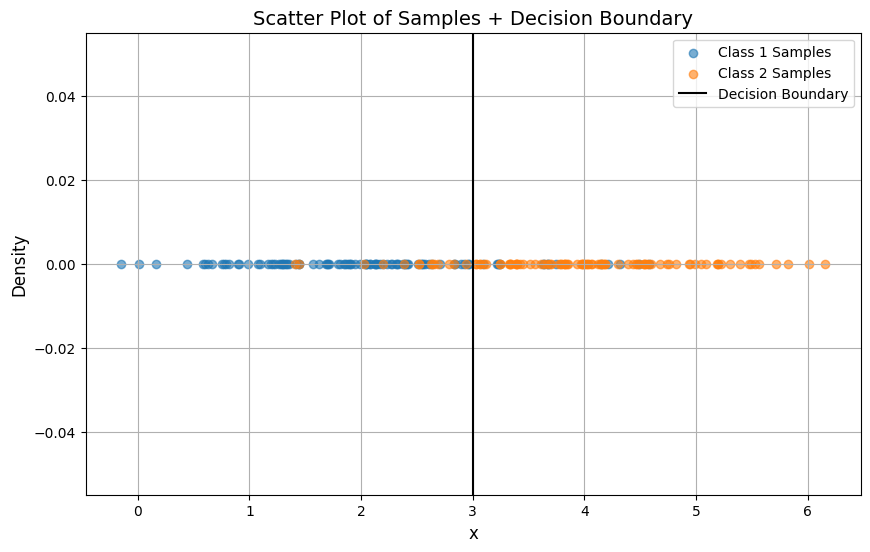

In [123]:
plot_scatter(samples1, samples2, decision_boundary)

## E - Labels + Evaluation Metrics

In [124]:
true_labels = [1] * 100 + [2] * 100
data = np.concatenate([samples1, samples2])

In [125]:
evaluation_metrics = EvaluationMetrics(data, true_labels, decision_boundary)

In [126]:
evaluation_metrics.print_metrics()

Accuracy: 0.855
Precision: 0.8585858585858586
Recall: 0.85
F1 Score: 0.8542713567839195


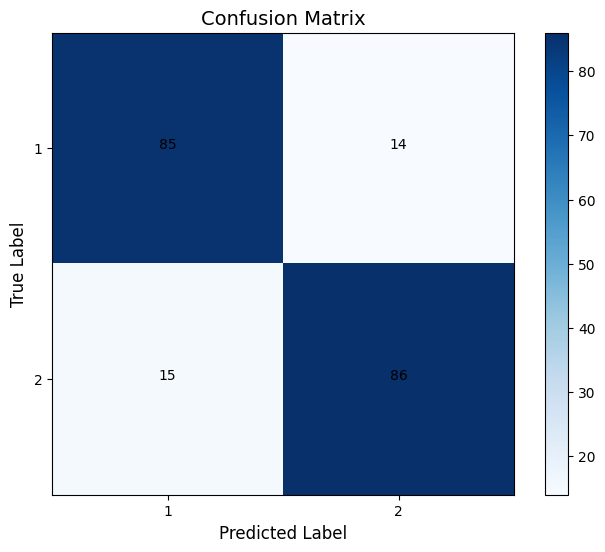

In [127]:
evaluation_metrics.plot_confusion_matrix()

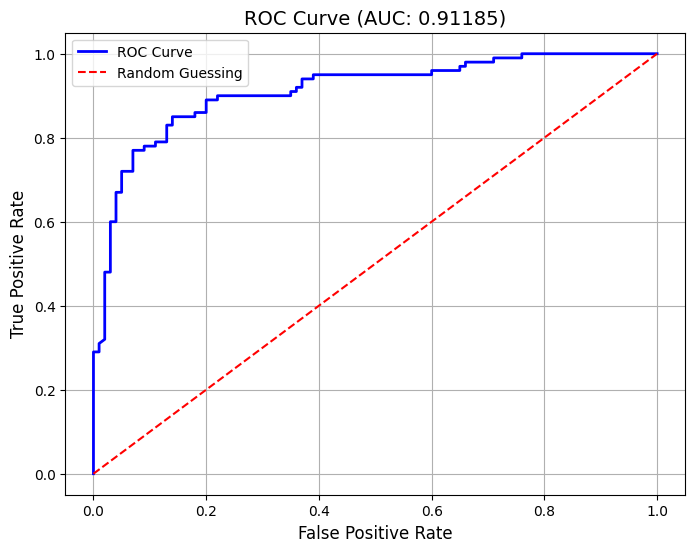

In [ ]:
evaluation_metrics.plot_roc_curve(g_x)

## F - Previous Sections For $\pi_1 = 0.9$ and $\pi_2 = 0.1$

In [129]:
mu1, sigma1, pi1 = 2, 1, 0.9
mu2, sigma2, pi2 = 4, 1, 1 - pi1

samples1 = np.random.normal(mu1, sigma1, 100)
samples2 = np.random.normal(mu2, sigma2, 100)

In [130]:
x = np.linspace(-2, 8, 10000)

g_x = problem_discriminant_func(x, mu1, sigma1, pi1, mu2, sigma2, pi2)
decision_boundary = disicion_boundary(x, g_x)

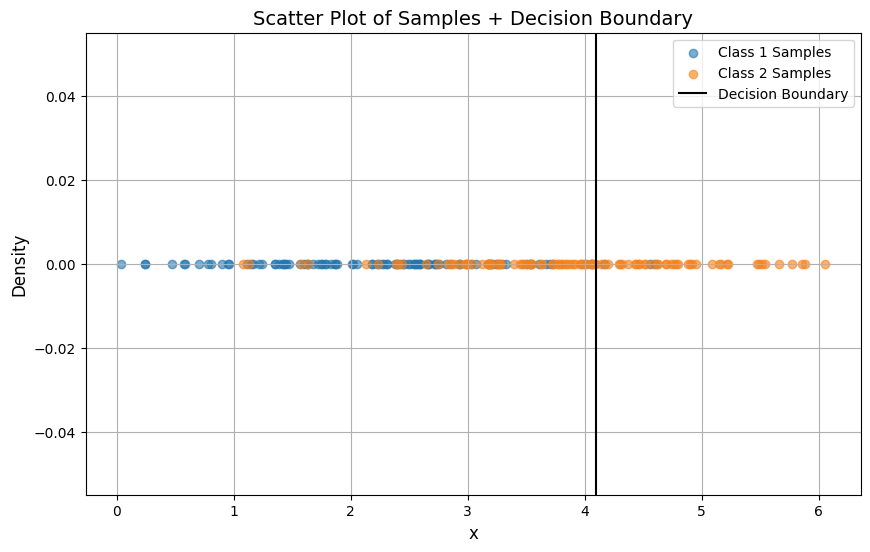

In [131]:
plot_scatter(samples1, samples2, decision_boundary)

In [132]:
true_labels = [1] * 100 + [2] * 100
data = np.concatenate([samples1, samples2])

In [133]:
evaluation_metrics = EvaluationMetrics(data, true_labels, decision_boundary)

In [134]:
evaluation_metrics.print_metrics()

Accuracy: 0.685
Precision: 0.6178343949044586
Recall: 0.97
F1 Score: 0.754863813229572


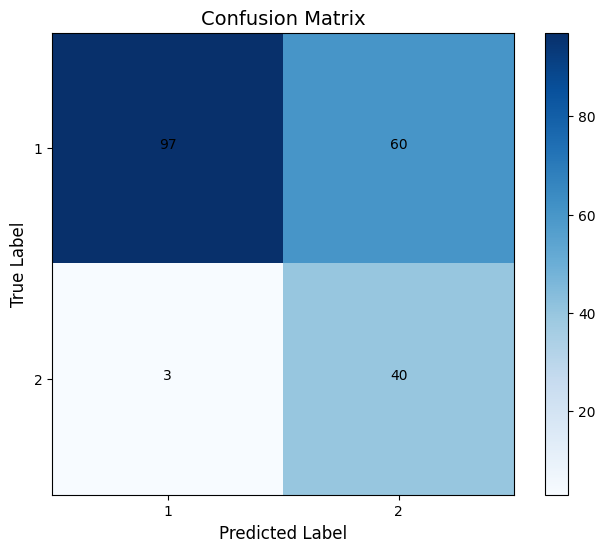

In [135]:
evaluation_metrics.plot_confusion_matrix()

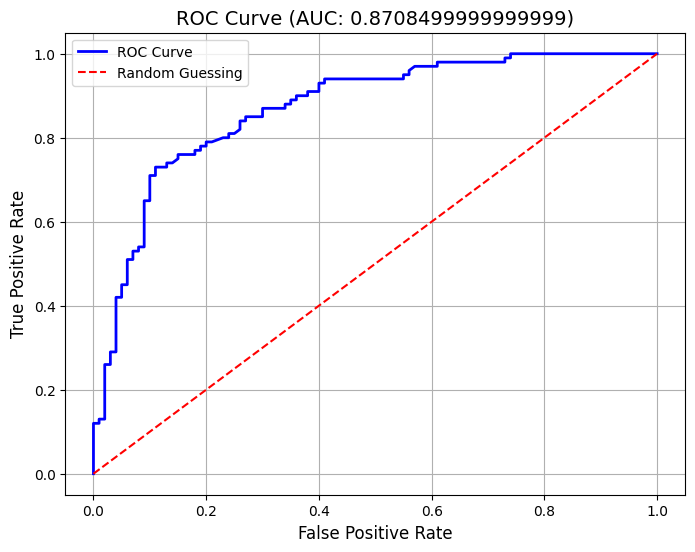

In [137]:
evaluation_metrics.plot_roc_curve(g_x)

### Analysis

1. **Decision Boundary** shifts from 3 to approximately 4.
   - This shift occurs because skewed priors increase the weight of the majority class (Class 1) in the decision-making process. The model requires stronger evidence to classify samples as Class 2, pushing the boundary closer to Class 2.

2. **Accuracy** decreases significantly from 0.855 to 0.685 under skewed priors.
   - When priors are imbalanced, the classifier heavily favors the majority class (Class 1). As a result, it frequently misclassifies samples from the minority class (Class 2), causing an overall drop in accuracy.

3. **Precision** drops from 0.859 to 0.618 with skewed priors.
   - Precision reflects the proportion of correct predictions for Class 1. With skewed priors, the model overpredicts Class 1, leading to an increase in false positives and a corresponding decline in precision.

4. **Recall** increases significantly from 0.85 to 0.97 under skewed priors.
   - Recall measures how many actual positives are correctly identified. Since the classifier predicts Class 1 more frequently with skewed priors, it captures almost all true positives, boosting recall.

5. **F1 Score** decreases from 0.854 to 0.755 with skewed priors.
   - The F1 Score balances precision and recall. While recall improves under skewed priors, the substantial drop in precision outweighs this improvement, resulting in a lower overall F1 Score.

6. **AUROC** declines slightly from 0.912 to 0.871 with skewed priors.
   - AUROC evaluates the model's ability to rank samples correctly, regardless of thresholds. Although it is less affected by changes in priors, the slight decline indicates a reduced ability of the model to distinguish between the two classes effectively.

---

In the presence of skewed priors, the choice of the best metric depends on the specific context and the consequences of misclassifications. Here's how the metrics apply in this situation:

1. **Recall:**
   - **Better if:** Missing positives (e.g., failing to detect actual instances of Class 1) has serious consequences. For example, in medical diagnoses or fraud detection, high recall ensures that most positive cases are identified.
   - **Concern:** High recall under skewed priors may lead to a large number of false positives.

2. **Precision:**
   - **Better if:** The cost of false positives is high, such as in cases where incorrectly labeling something as Class 1 is undesirable (e.g., spam email detection).
   - **Concern:** Precision drops significantly under skewed priors because of overprediction of the majority class.

3. **F1 Score:**
   - **Better if:** A balance between precision and recall is desired. This is useful in scenarios where both false positives and false negatives have similar costs.
   - **Concern:** The F1 Score drops under skewed priors, but it still provides a good sense of the trade-off between precision and recall.

4. **AUROC:**
   - **Better if:** You need a threshold-independent measure of the model’s ranking ability. AUROC evaluates the overall separability of the classes and is useful for comparing models in an imbalanced setting.
   - **Concern:** AUROC is less sensitive to skewed priors, but it doesn't directly address threshold-based decisions.

5. **Accuracy:**
   - **Not recommended in this situation:** Accuracy becomes unreliable in imbalanced datasets or skewed priors because it is heavily influenced by the majority class.

### **Conclusion**
- **Primary Metrics:** Use **AUROC** to assess the model's overall ranking ability, and complement it with **F1 Score** if you need a threshold-dependent measure that balances precision and recall.
- **Context-Specific Metrics:** Focus on **recall** if missing true positives is critical, or **precision** if false positives are costly.